In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
data = pd.read_csv('agegap_zscores.tsv', sep='\t')
death_types = {
    0: "DTHHRDY 0:\nVentilator Death",
    1: "DTHHRDY 1:\nAccident or Suicide",
    2: "DTHHRDY 2:\nNatural Fast Death",
    3: "DTHHRDY 3 or 4:\nSlow Death"
}
data['DTHHRDY'] = data['DTHHRDY'].replace({4: 3})
organs = ["adipose_subcutaneous","artery_aorta","artery_coronary","brain_cerebellum","brain_cortex","colon_sigmoid","heart_atrial_appendage","liver","lung","nerve_tibial","pancreas","skin_sun_exposed_lower_leg","min","max"]
unique_categories = sorted(data['DTHHRDY'].unique())
x_labels = [f"{death_types[no]}" for no in unique_categories]

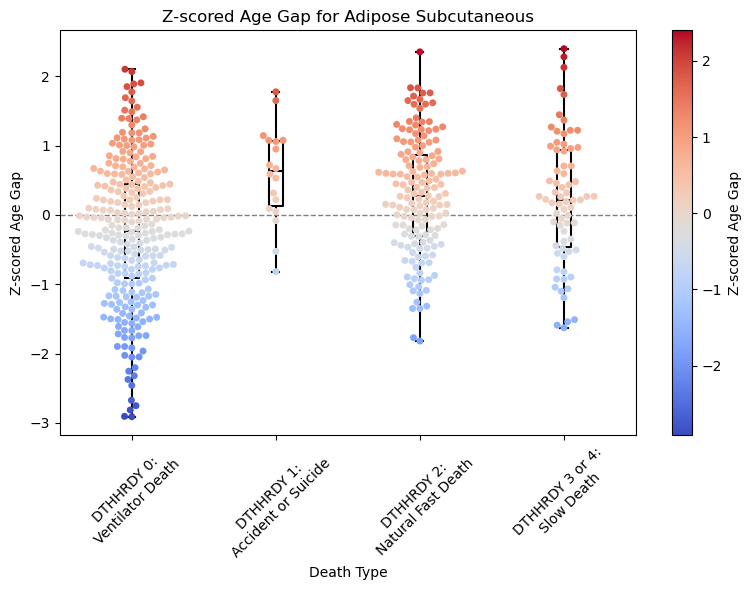

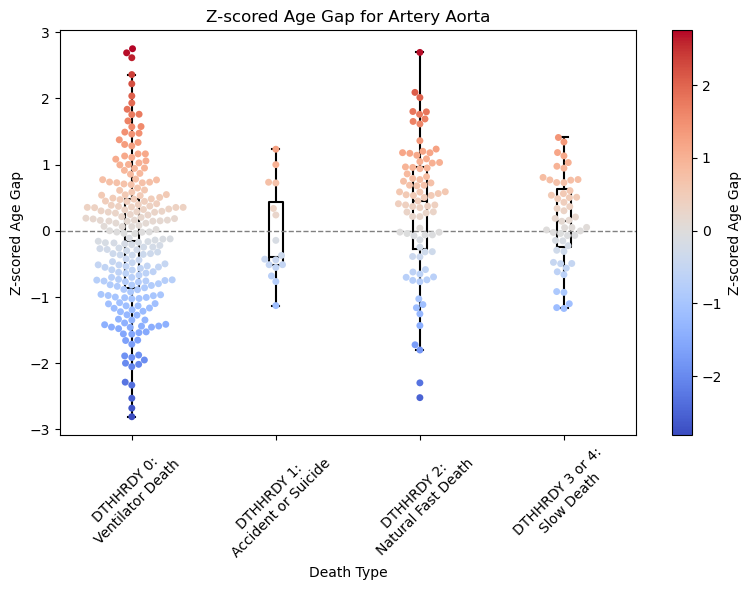

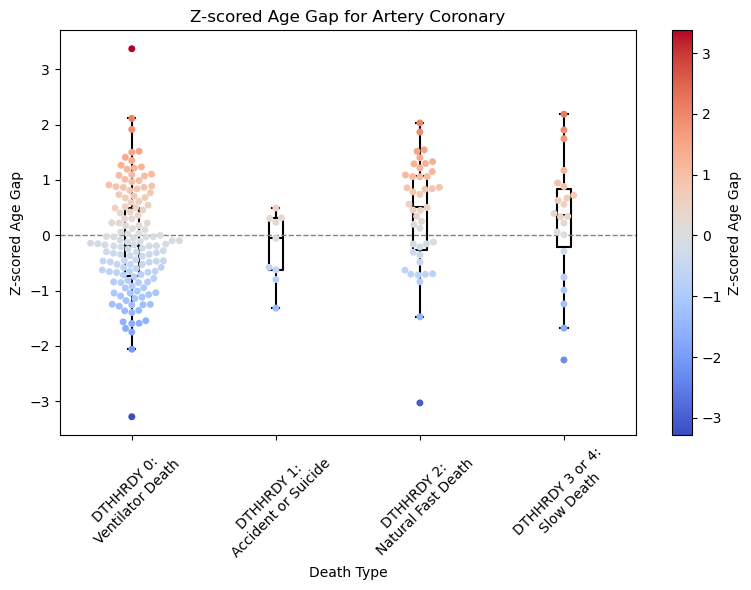

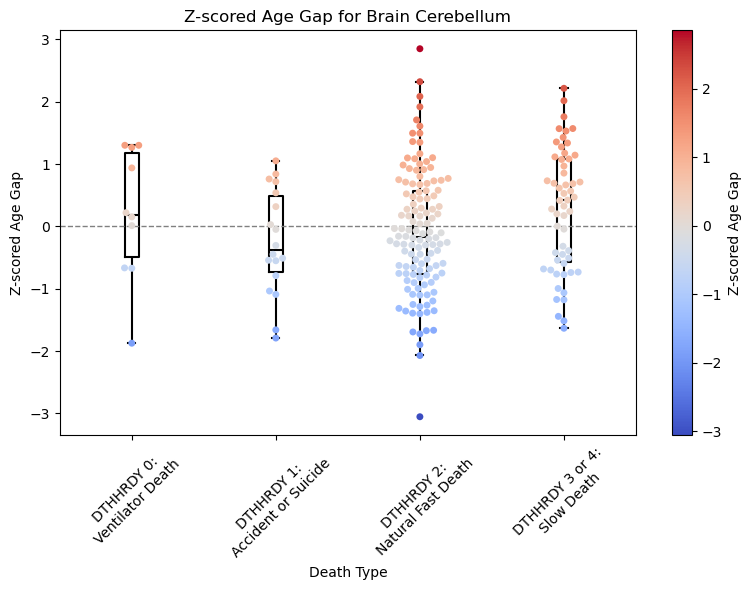

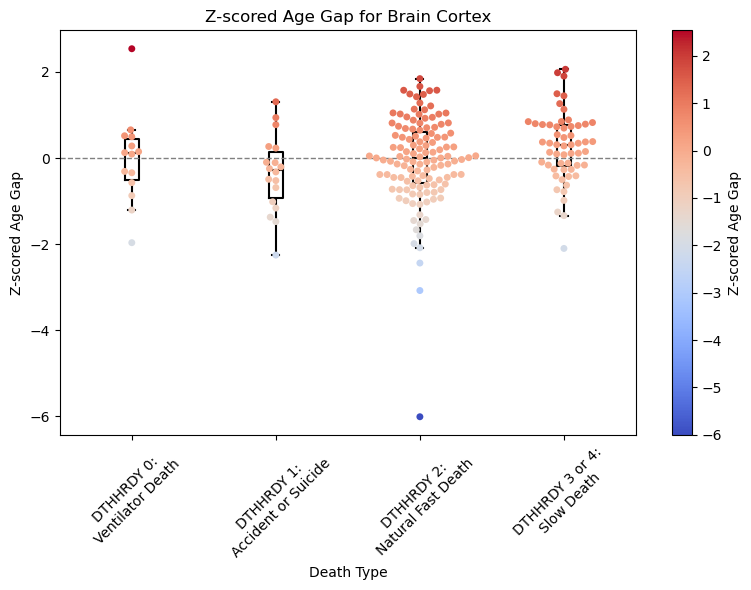

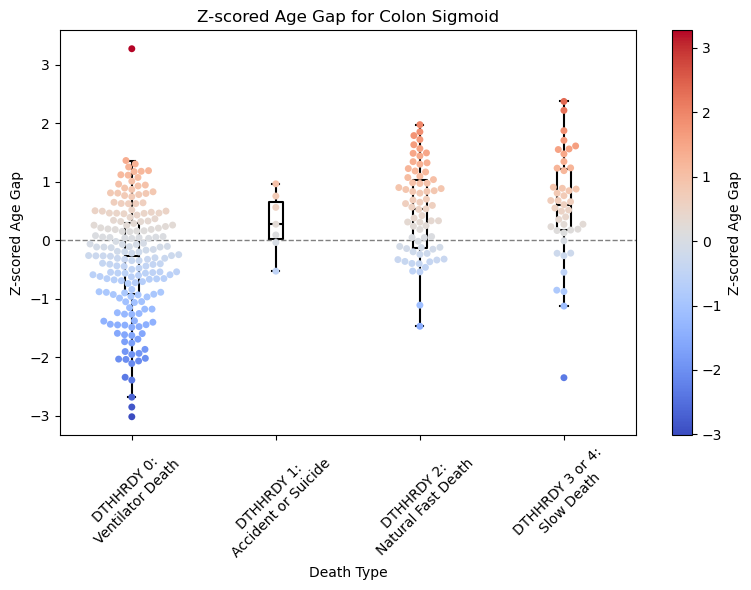

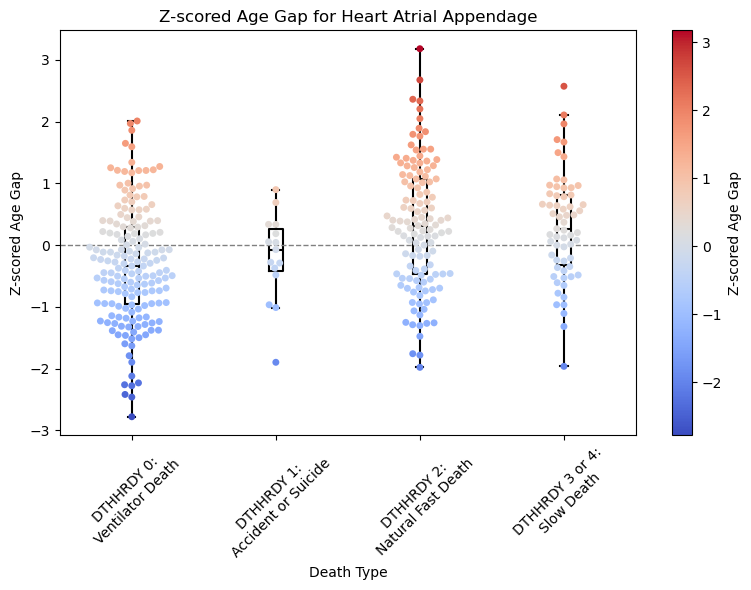

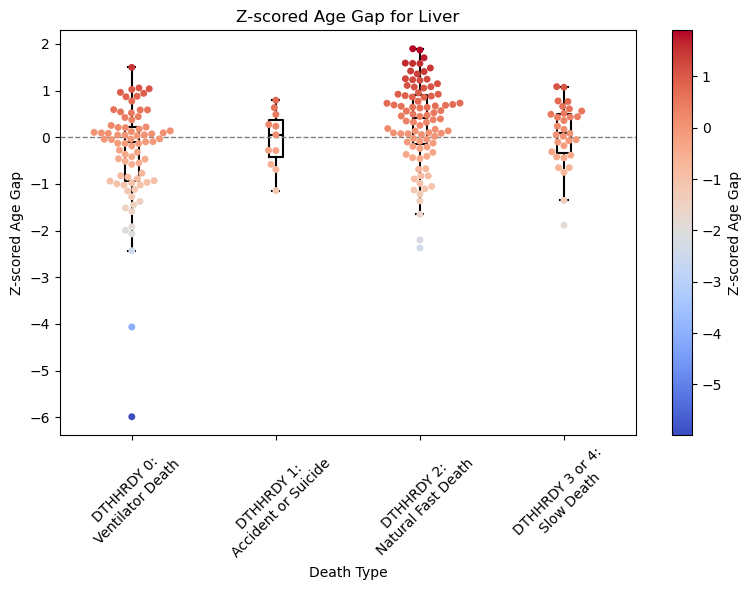

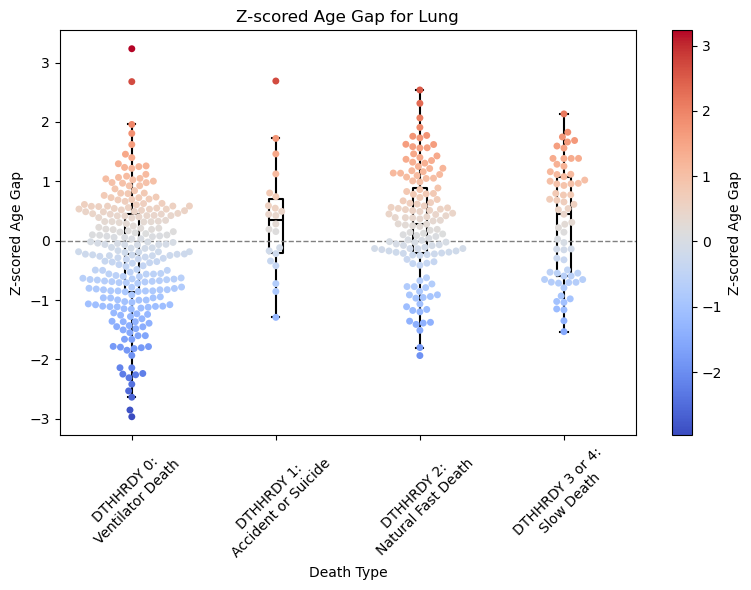

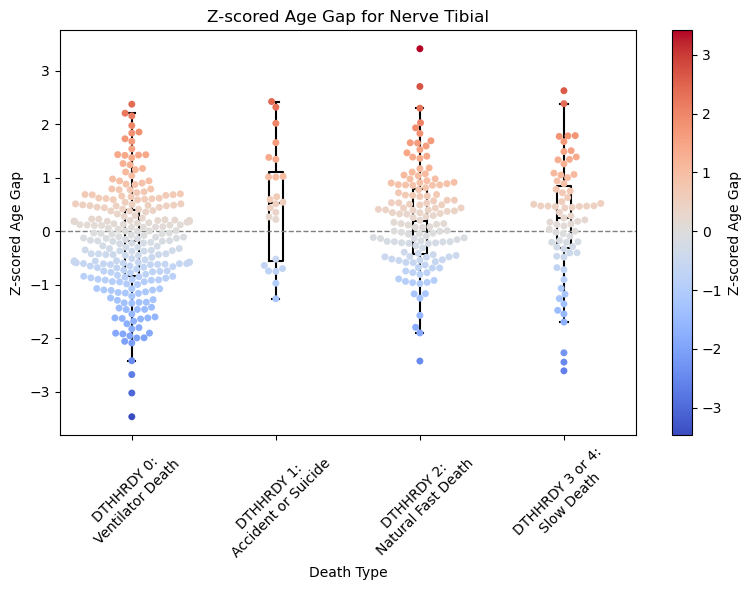

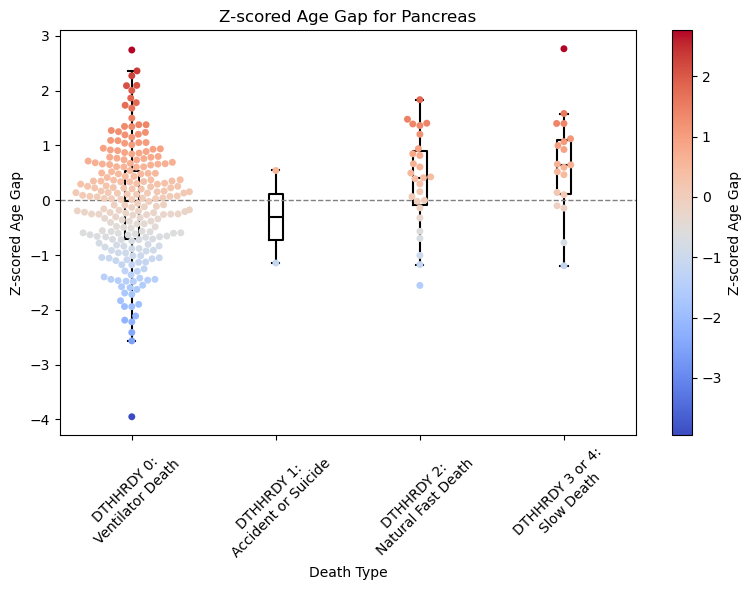

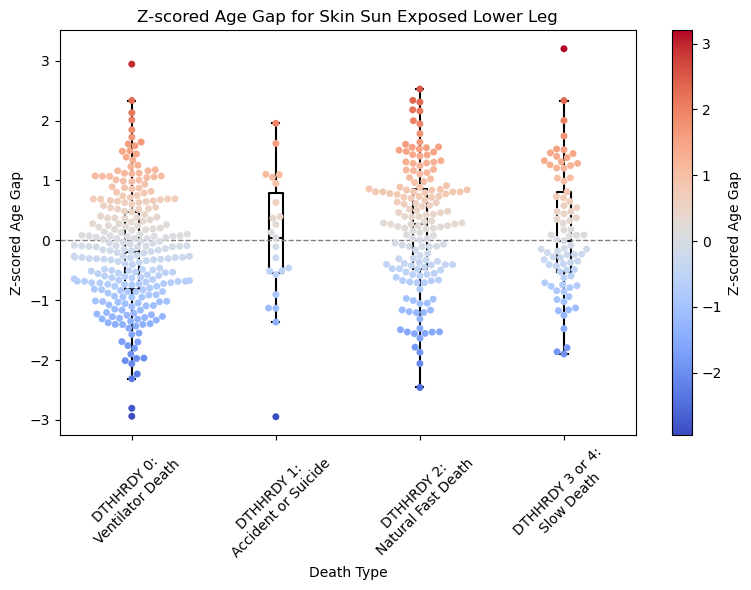

c:\Users\mubas\miniconda3\envs\deg\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


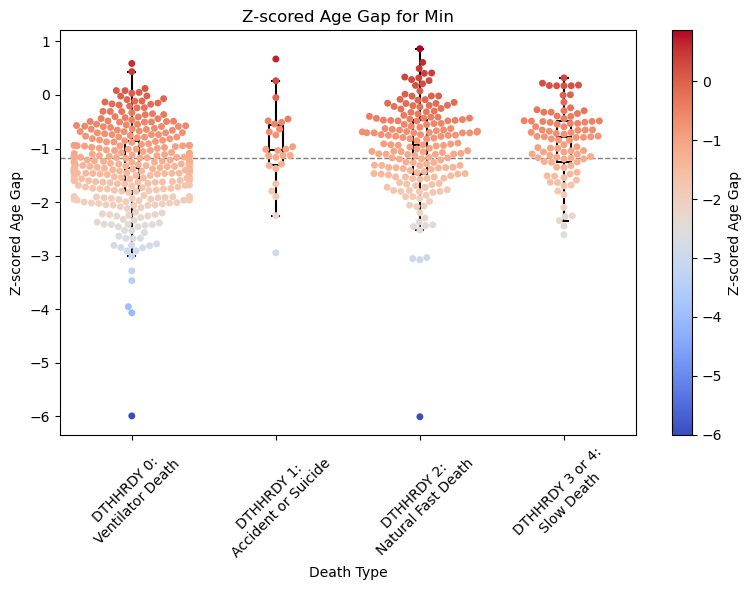

c:\Users\mubas\miniconda3\envs\deg\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


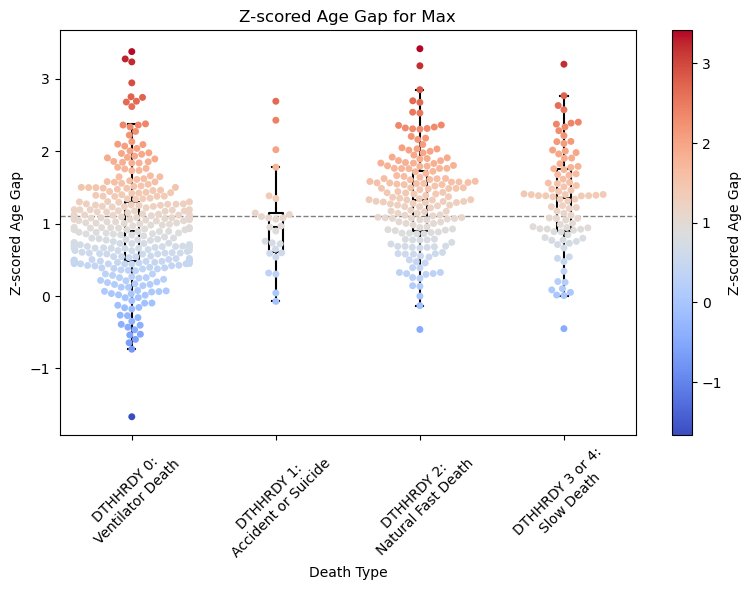

In [38]:
for organ in organs:
    plt.figure(figsize=(8, 6))
    mean_zscore = data[f"agegap_{organ}"].mean()
    
    scatter = sns.swarmplot(
        data=data, 
        x='DTHHRDY', 
        y=f"agegap_{organ}", 
        hue=f"agegap_{organ}",
        palette='coolwarm', 
        alpha=1, 
        edgecolor=None,
        legend=False
    )
    
    sns.boxplot(
        data=data, 
        x='DTHHRDY', 
        y=f"agegap_{organ}",
        width=0.1, 
        color="black", 
        showfliers=False,
        fill=False
    )

    plt.axhline(mean_zscore, color='gray', linestyle='--', linewidth=1)
    
    plt.title(f"Z-scored Age Gap for {organ.replace('_', ' ').title()}")
    plt.xlabel("Death Type")
    plt.ylabel("Z-scored Age Gap")

    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

    norm = plt.Normalize(data[f"agegap_{organ}"].min(), data[f"agegap_{organ}"].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=scatter.axes)
    cbar.set_label("Z-scored Age Gap")

    plt.tight_layout()

    plt.savefig(f"plots/z_scored_age_gap_{organ}.png")
    plt.show()